# Lead Scoring Case Study

## Problem Statement

- An education company named X Education sells online courses to industry professionals.
On any given day, many professionals who are interested in the courses land on their website and
browse for courses. They have process of form filling on their website after which the company
that individual as a lead.
- Once these leads are acquired, employees from the sales team start making calls, writing emails,
etc.Through this process, some of the leads get converted while most do not.
- The typical lead conversion rate at X education is around 30%. Now, this means if, say, they
acquire 100 leads in a day, only about 30 of them are converted. To make this process more
efficient, the company wishes to identify the most potential leads, also known as Hot Leads.
- If they successfully identify this set of leads, the lead conversion rate should go up as the sales
team will now be focusing more on communicating with the potential leads rather than making
calls to everyone

In [729]:
#importing neccessary libraries
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [730]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [731]:
#reading the dataset
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [732]:
#checking the shape of the dataset
leads.shape


(9240, 37)

In [733]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [734]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step-1 : Data Cleaning and preparation

In [735]:
#checking the number of missing values 
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [736]:
#checking the percentage of missing values 
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [737]:
#dropping cloumns having missing values mpre than 30%
cols=leads.columns

for i in cols:
    if ((100*(leads[i].isnull().sum()/len(leads.index)))>=30):
        leads.drop(i,axis=1,inplace=True)


In [738]:
#checking shape after dropping the columns
leads.shape

(9240, 31)

In [739]:
#checking the number of missing values in each column again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [740]:
#checking the value counts of 'Country' column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

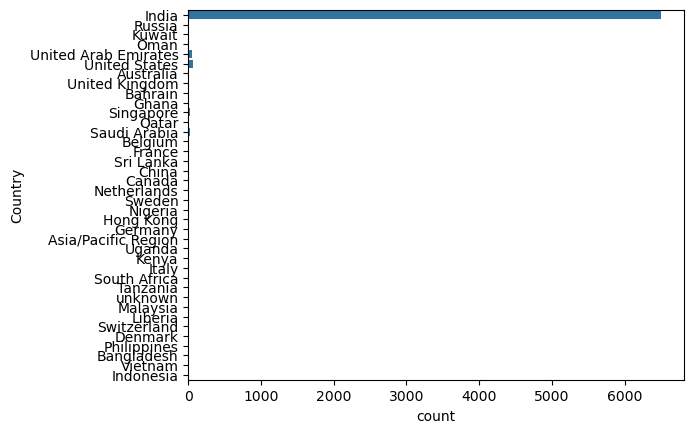

In [741]:
#plotting count plot
sns.countplot(leads['Country'])
plt.show()

Since the number of leads from India are quite large so this columns doesn't make any sense to the model building. So, it can be dropped.

In [742]:
#dropping country column
leads.drop('Country', axis=1, inplace=True)

In [743]:
#checking the value counts of 'City' column
leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

As we can see that there is a level "Select" can be treated as null value because in forms or dropdown menus, 'Select' is often the default option presented to users.
So we will replace 'Select' with NaN to clearly mark it as missing data.



In [744]:
#replacing 'Select' with Nan
leads['City'].replace('Select', np.nan, inplace=True)


In [745]:
#checking the value counts of 'City' column again

leads['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Still there are null values which needs to be treated

In [746]:
#imputting missing values with mode in this case'Mumbai'
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])


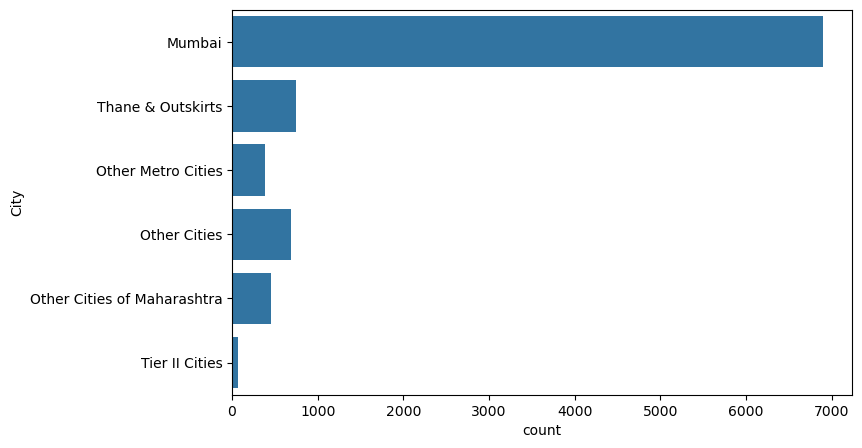

In [747]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(8,5))
sns.countplot(leads.City)
plt.show()

In [748]:
# checking value count of Specialization column
leads['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

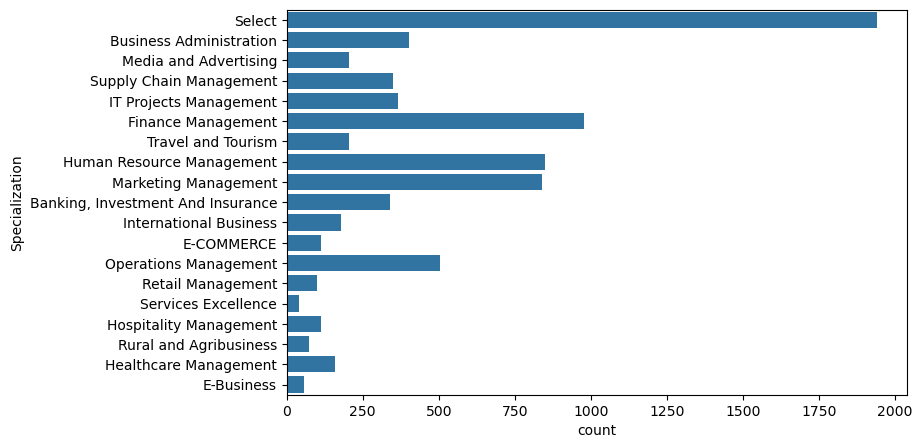

In [749]:
#plotting countplot
plt.figure(figsize=(8,5))
sns.countplot(leads.Specialization)
plt.show()

Since there are many specializations related to management, so we can combine them under one category

In [750]:
#Since there are many specializations related to management, so we can combine them under one category
leads['Specialization']=leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management')

In [751]:
# checking value count of Specialization column
leads['Specialization'].value_counts(dropna=False)

Specialization
Management                           4253
Select                               1942
NaN                                  1438
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

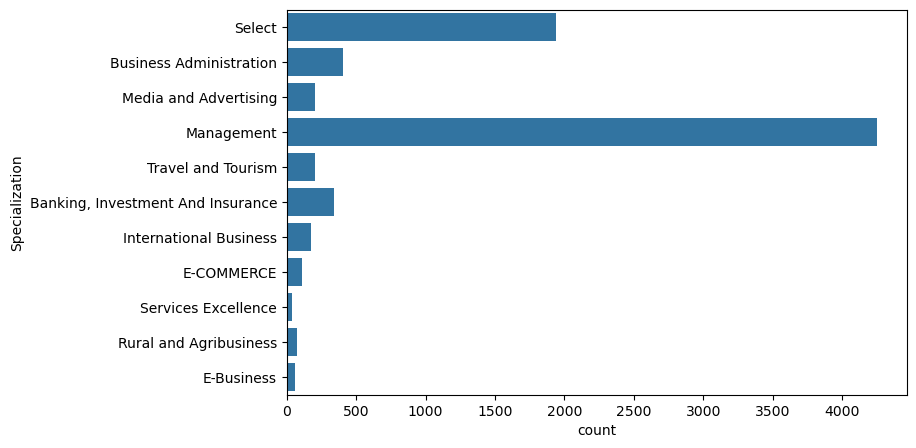

In [752]:
#plotting countplot again
plt.figure(figsize=(8,5))
sns.countplot(leads.Specialization)
plt.show()

In [753]:
#dropping the columns which have almost no use to model building
cols_to_drop=['Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses',
      'Update me on Supply Chain Content', 'Get updates on DM Content',
    'I agree to pay the amount through cheque','Magazine', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content', 'Get updates on DM Content',
    'I agree to pay the amount through cheque','Do Not Call',  'What matters most to you in choosing a course', 'Search', 'A free copy of Mastering The Interview','How did you hear about X Education','Lead Profile']
leads.drop(cols_to_drop,axis=1,inplace=True)

In [754]:
##checking shape after dropping the columns
leads.shape

(9240, 14)

In [755]:
#checking the number of missing values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation    2690
Specialization                     1438
TotalVisits                         137
Page Views Per Visit                137
Last Activity                       103
Lead Source                          36
Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Do Not Email                          0
Converted                             0
Total Time Spent on Website           0
City                                  0
Last Notable Activity                 0
dtype: int64

In [756]:
# checking value count of 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

We can see in the column `What is your current occupation` has a lot of null values. So we can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [757]:
#dropping null value rows
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [758]:
#checking the number of missing values again
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                        130
Page Views Per Visit               130
Last Activity                      103
Lead Source                         36
Specialization                      18
Prospect ID                          0
Lead Number                          0
Lead Origin                          0
Do Not Email                         0
Converted                            0
Total Time Spent on Website          0
What is your current occupation      0
City                                 0
Last Notable Activity                0
dtype: int64

In [759]:
#dropping the the null value rows in the mentioned columns
leads.dropna(subset=['TotalVisits','Page Views Per Visit','Last Activity','Lead Source','Specialization'], inplace=True)

In [760]:
#checking the number of missing values
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
City                               0
Last Notable Activity              0
dtype: int64

Now data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [761]:
print('The number of datapoints present in the dataset is',len(leads.index))
print(len(leads.index)/9240)

The number of datapoints present in the dataset is 6373
0.6897186147186147


We still have around 69% of the rows 

In [762]:
#checking the view the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [763]:
# Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

### Correlation matrix

In [764]:
#filtering numeric columns
num_leads=leads.select_dtypes(include=['number'])

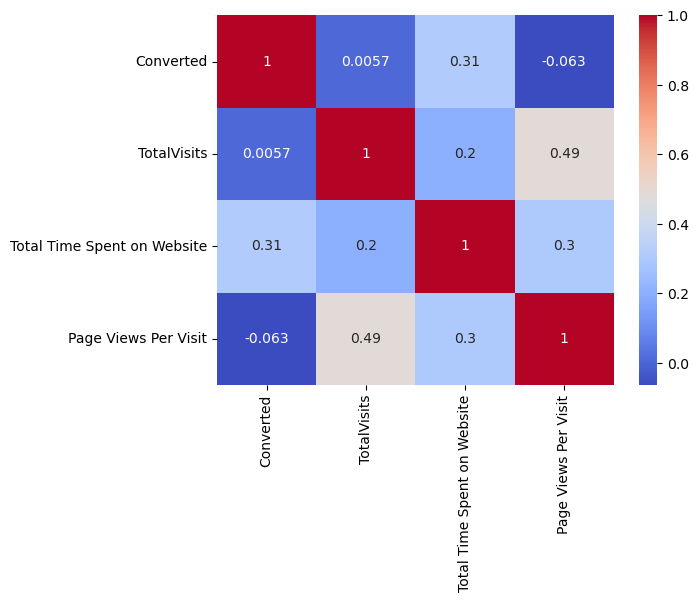

In [765]:
sns.heatmap(num_leads.corr(),cmap='coolwarm',annot=True)
plt.show()

### Outliers tratement

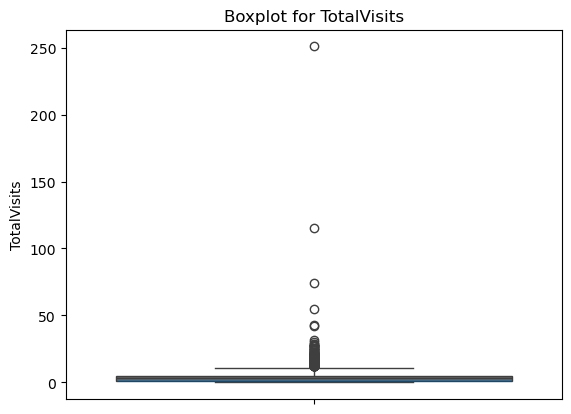

In [766]:
# Boxplot for TotalVisits
sns.boxplot(data=leads['TotalVisits'])
plt.title('Boxplot for TotalVisits')
plt.show()

We can clearly see the outliers are present in TotalVisits

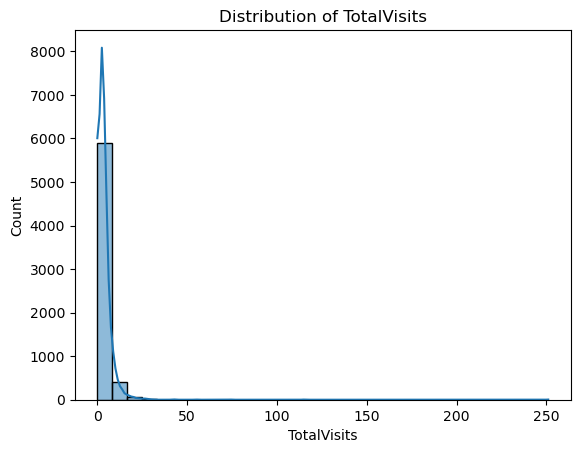

In [767]:
#plotting histogram to understand the distribution
sns.histplot(leads['TotalVisits'], kde=True, bins=30)
plt.title('Distribution of TotalVisits')
plt.show()

We can see that the distribution is highly skewed, the histogram shows a strong right-skew, where most data points are clustered near 0–10 visits.The long tail extending beyond 50 visits highlights the presence of extreme outliers.


In [768]:
#detecting outliers
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = leads[(leads['TotalVisits'] < lower_bound) | (leads['TotalVisits'] > upper_bound)]
print(f"Number of Outliers in TotalVisits: {len(outliers)}")

Number of Outliers in TotalVisits: 205


Removing the top and bottom 1% of outlier values from a column can help, especially when outliers are extreme but not meaningful

In [769]:
# Calculating the top and bottom 1% thresholds
lower_limit = leads['TotalVisits'].quantile(0.01)
upper_limit = leads['TotalVisits'].quantile(0.99)

In [770]:
# Filter out rows outside the thresholds
leads1 = leads[(leads['TotalVisits'] >= lower_limit) & (leads['TotalVisits'] <= upper_limit)]


In [771]:
# Check the resulting shape and distribution
print("Original Shape:", leads.shape)
print("Trimmed Shape:", leads1.shape)

Original Shape: (6373, 12)
Trimmed Shape: (6320, 12)


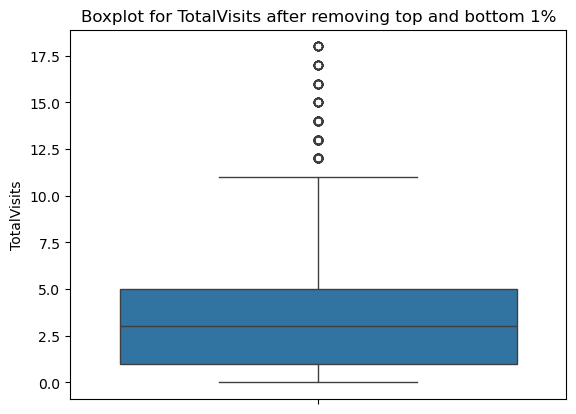

In [772]:
sns.boxplot(data=leads1['TotalVisits'])
plt.title('Boxplot for TotalVisits after removing top and bottom 1%')
plt.show()

Outliers Check for Page Views Per Visit

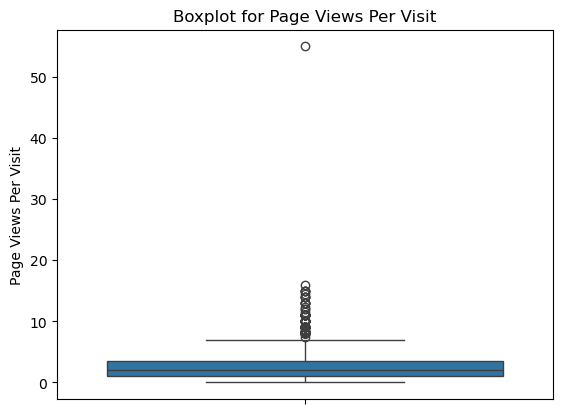

In [773]:
# Boxplot for Page Views Per Visit
sns.boxplot(data=leads['Page Views Per Visit'])
plt.title('Boxplot for Page Views Per Visit')
plt.show()

There are several outliers at the higher end

In [774]:
# Calculating the top and bottom 1% thresholds
lower_limit = leads['Page Views Per Visit'].quantile(0.01)
upper_limit = leads['Page Views Per Visit'].quantile(0.99)

In [775]:
# Filter out rows outside the thresholds
leads1 = leads[(leads['Page Views Per Visit'] >= lower_limit) & (leads['Page Views Per Visit'] <= upper_limit)]


In [776]:
# Check the resulting shape and distribution
print("Original Shape:", leads.shape)
print("Trimmed Shape:", leads1.shape)

Original Shape: (6373, 12)
Trimmed Shape: (6321, 12)


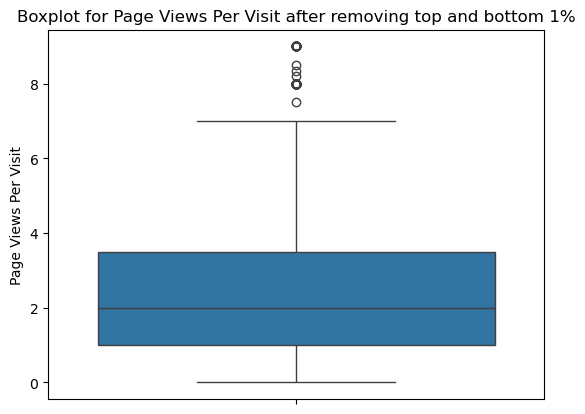

In [777]:
#Boxplot for Page Views Per Visit after removing top and bottom 1%
sns.boxplot(data=leads1['Page Views Per Visit'])
plt.title('Boxplot for Page Views Per Visit after removing top and bottom 1%')
plt.show()

In [778]:
# To check the conversion rate
conversion = (sum(leads1['Converted'])/len(leads1['Converted'].index))*100
conversion

48.093656067077994

### Dummy Variable Creation

In [779]:
# Check the columns which are of type 'object'

df = leads1.loc[:, leads.dtypes == 'object']
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [780]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                               'What is your current occupation', 'City',
       'Last Notable Activity']], drop_first=True,dtype='int')

In [781]:
# Adding the results to the master dataframe
leads1 = pd.concat([leads1, dummy], axis=1)

In [782]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
dummy_spl = pd.get_dummies(leads1['Specialization'], prefix = 'Specialization',dtype='int')

In [783]:
# dropping that level by specifying it explicitly
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)

In [784]:
# Adding the results to the master dataframe
leads1 = pd.concat([leads1, dummy_spl], axis = 1)

In [785]:
# Drop the variables for which the dummy variables have been created
leads1 = leads1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],axis= 1)

In [786]:
#checking the head
leads1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train- Test Split

In [787]:
# Put all the feature variables in X
X = leads1.drop('Converted', axis=1)

In [788]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [789]:
# Put the target variable in y
y = leads1['Converted']

In [790]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [791]:
# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


In [792]:
#printing shape of X_train, X_test, y_train, y_test
print('The shape of X_train ', X_train.shape)
print('The shape of X_test ', X_test.shape)
print('The shape of y_train ', y_train.shape)
print('The shape of y_test ', y_test.shape)

The shape of X_train  (5056, 70)
The shape of X_test  (1265, 70)
The shape of y_train  (5056,)
The shape of y_test  (1265,)


### Scaling

In [793]:
#scaling the features
scaler = MinMaxScaler()
# TotalVisits, Total Time Spent on Website, Page Views Per Visit
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
4530,0.015936,0.021127,0.444444,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9125,0.023904,0.154489,0.222222,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6561,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,0.007968,0.037852,0.111111,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2647,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Looking at the correlations

In [794]:
# Looking at the correlation table
leads1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
Converted,1.000000,0.010846,0.312031,-0.067079,-0.117674,0.289969,-0.019349,-0.132638,-0.021295,0.020571,...,0.036455,0.015258,-0.018029,-0.012944,-0.023931,0.079828,-0.002970,0.006993,-0.007941,-0.012295
TotalVisits,0.010846,1.000000,0.206655,0.450176,0.271921,-0.211324,-0.043594,0.076630,-0.042582,0.097343,...,0.045382,0.040159,0.017497,0.016691,0.030703,0.097253,0.040042,0.072798,0.013901,0.061323
Total Time Spent on Website,0.312031,0.206655,1.000000,0.338095,0.276556,-0.249643,-0.061479,0.115312,-0.060990,0.230149,...,0.028468,0.052457,0.004190,-0.004647,0.012335,0.165543,0.040563,0.019120,0.002725,0.037291
Page Views Per Visit,-0.067079,0.450176,0.338095,1.000000,0.511681,-0.377007,-0.072650,0.130059,-0.069333,0.226438,...,0.086728,0.046450,0.045788,0.034621,0.067168,0.181142,0.069967,0.035712,0.010317,0.107167
Lead Origin_Landing Page Submission,-0.117674,0.271921,0.276556,0.511681,1.000000,-0.364417,-0.075021,0.511848,-0.071596,0.068257,...,0.084898,0.113514,0.056714,0.065767,0.089214,0.421407,0.093338,0.050525,0.038321,0.094170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Management,0.079828,0.097253,0.165543,0.181142,0.421407,-0.010092,-0.024263,0.234842,-0.026299,0.053454,...,-0.216615,-0.235226,-0.085870,-0.115976,-0.153277,1.000000,-0.166669,-0.099848,-0.064055,-0.157856
Specialization_Media and Advertising,-0.002970,0.040042,0.040563,0.069967,0.093338,-0.044112,0.004970,0.006953,0.004498,-0.002787,...,-0.033536,-0.036417,-0.013294,-0.017955,-0.023730,-0.166669,1.000000,-0.015458,-0.009917,-0.024439
Specialization_Rural and Agribusiness,0.006993,0.072798,0.019120,0.035712,0.050525,-0.019131,-0.006303,0.021491,-0.006419,-0.038011,...,-0.020091,-0.021817,-0.007964,-0.010757,-0.014216,-0.099848,-0.015458,1.000000,-0.005941,-0.014641
Specialization_Services Excellence,-0.007941,0.013901,0.002725,0.010317,0.038321,-0.010738,-0.004043,0.056005,-0.004118,-0.026093,...,-0.012889,-0.013996,-0.005109,-0.006901,-0.009120,-0.064055,-0.009917,-0.005941,1.000000,-0.009393


## Step-2: Model Building

Feature selection using RFE

In [795]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [796]:
# running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [797]:
# features those have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 54),
 ('Lead Source_testone', False, 32),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link C

In [798]:
# Putting all the columns selected by RFE in the variable 'col'
cols = X_train.columns[rfe.support_]

In [799]:
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [800]:
# Select only the columns selected by RFE
X_train = X_train[cols]

In [801]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train,has_constant = "add")
model1 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5056
Model:                            GLM   Df Residuals:                     5040
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.1
Date:                Tue, 17 Dec 2024   Deviance:                       4616.3
Time:                        20:08:14   Pearson chi2:                 5.32e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2414      0.580     -2.142      0.032      -2.377      -0.105
TotalVisits                                             10.8200      2.727      3.968      0.000       5.475      16.165
Total Time Spent on Website                              4.4537      0.177     25.233      0.000       4.108       4.800
Lead Origin_Lead Add Form                                3.8432      0.222     17.330      0.000       3.408       4.278
Lead Source_Olark Chat                                   1.6405      0.121     13.591      0.000       1.404       1.877
Lead Source_Welingak Website                            22.5201   1.28e+04      0.002      0.999   -2.51e+04    2.52e+04
Do Not Email_Yes                                        -1.5682      0.180     -8.716      0.000      -1.921      -1.216
Last Activity_Converted to Lead                         -1.0750      0.224     -4.808      0.000      -1.513      -0.637
Last Activity_Olark Chat Conversation                   -1.0987      0.170     -6.460      0.000      -1.432      -0.765
Last Activity_SMS Sent                                   1.1126      0.079     14.061      0.000       0.958       1.268
What is your current occupation_Housewife               23.7663   4.02e+04      0.001      1.000   -7.88e+04    7.88e+04
What is your current occupation_Student                 -1.1093      0.608     -1.823      0.068      -2.302       0.083
What is your current occupation_Unemployed              -0.9996      0.573     -1.746      0.081      -2.122       0.123
What is your current occupation_Working Professional     1.5775      0.597      2.644      0.008       0.408       2.747
Last Notable Activity_Had a Phone Conversation          24.6596   3.45e+04      0.001      0.999   -6.75e+04    6.76e+04
Last Notable Activity_Unreachable                        2.7054      0.802      3.373      0.001       1.133       4.277
========================================================================================================================
"""

Since the p-value for 'Lead Source_Welingak Website' is high, we shoulkd drop it

In [802]:
# Let's first drop the variable `Lead Source_Welingak Website` since it has a high p-value 
X_train_sm.drop('Lead Source_Welingak Website', axis=1, inplace=True)

In [803]:
# Refit the model with the new set of features

model2 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5056
Model:                            GLM   Df Residuals:                     5041
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2318.2
Date:                Tue, 17 Dec 2024   Deviance:                       4636.4
Time:                        20:08:14   Pearson chi2:                 5.60e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2507      0.581     -2.152      0.031      -2.390      -0.112
TotalVisits                                             10.8102      2.731      3.958      0.000       5.457      16.164
Total Time Spent on Website                              4.4520      0.176     25.231      0.000       4.106       4.798
Lead Origin_Lead Add Form                                4.2233      0.218     19.352      0.000       3.796       4.651
Lead Source_Olark Chat                                   1.6396      0.121     13.585      0.000       1.403       1.876
Do Not Email_Yes                                        -1.5385      0.177     -8.699      0.000      -1.885      -1.192
Last Activity_Converted to Lead                         -1.0715      0.223     -4.795      0.000      -1.509      -0.634
Last Activity_Olark Chat Conversation                   -1.0907      0.169     -6.436      0.000      -1.423      -0.759
Last Activity_SMS Sent                                   1.1156      0.079     14.117      0.000       0.961       1.271
What is your current occupation_Housewife               22.7335    2.4e+04      0.001      0.999   -4.71e+04    4.72e+04
What is your current occupation_Student                 -1.1186      0.610     -1.833      0.067      -2.315       0.078
What is your current occupation_Unemployed              -0.9914      0.574     -1.727      0.084      -2.116       0.134
What is your current occupation_Working Professional     1.5743      0.598      2.632      0.008       0.402       2.747
Last Notable Activity_Had a Phone Conversation          23.6640   2.09e+04      0.001      0.999    -4.1e+04    4.11e+04
Last Notable Activity_Unreachable                        2.7016      0.803      3.365      0.001       1.128       4.275
========================================================================================================================
"""

In [804]:
# dropping the variable `What is your current occupation_Housewife` since it has a high p-value 
X_train_sm.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [805]:
# Refit the model with the new set of features

model3= sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5056
Model:                            GLM   Df Residuals:                     5042
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2320.6
Date:                Tue, 17 Dec 2024   Deviance:                       4641.1
Time:                        20:08:14   Pearson chi2:                 5.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3725
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7407      0.534     -1.388      0.165      -1.786       0.305
TotalVisits                                             10.5912      2.712      3.905      0.000       5.275      15.907
Total Time Spent on Website                              4.4490      0.176     25.232      0.000       4.103       4.795
Lead Origin_Lead Add Form                                4.2209      0.218     19.354      0.000       3.793       4.648
Lead Source_Olark Chat                                   1.6338      0.121     13.557      0.000       1.398       1.870
Do Not Email_Yes                                        -1.5413      0.177     -8.708      0.000      -1.888      -1.194
Last Activity_Converted to Lead                         -1.0745      0.223     -4.810      0.000      -1.512      -0.637
Last Activity_Olark Chat Conversation                   -1.0967      0.170     -6.464      0.000      -1.429      -0.764
Last Activity_SMS Sent                                   1.1144      0.079     14.103      0.000       0.960       1.269
What is your current occupation_Student                 -1.6223      0.567     -2.861      0.004      -2.734      -0.511
What is your current occupation_Unemployed              -1.4953      0.528     -2.833      0.005      -2.530      -0.461
What is your current occupation_Working Professional     1.0699      0.554      1.932      0.053      -0.016       2.155
Last Notable Activity_Had a Phone Conversation          22.6670   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
Last Notable Activity_Unreachable                        2.6999      0.803      3.363      0.001       1.126       4.273
========================================================================================================================
"""

In [806]:
# dropping the variable `Last Notable Activity_Had a Phone Conversation` since it has a high p-value 
X_train_sm.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [807]:
# Refit the model with the new set of features

model4= sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5056
Model:                            GLM   Df Residuals:                     5043
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.2
Date:                Tue, 17 Dec 2024   Deviance:                       4654.5
Time:                        20:08:14   Pearson chi2:                 5.61e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7497      0.533     -1.405      0.160      -1.795       0.296
TotalVisits                                             11.0891      2.744      4.042      0.000       5.711      16.467
Total Time Spent on Website                              4.4391      0.176     25.236      0.000       4.094       4.784
Lead Origin_Lead Add Form                                4.2206      0.218     19.345      0.000       3.793       4.648
Lead Source_Olark Chat                                   1.6334      0.121     13.541      0.000       1.397       1.870
Do Not Email_Yes                                        -1.5466      0.177     -8.739      0.000      -1.893      -1.200
Last Activity_Converted to Lead                         -1.0790      0.223     -4.832      0.000      -1.517      -0.641
Last Activity_Olark Chat Conversation                   -1.1026      0.170     -6.500      0.000      -1.435      -0.770
Last Activity_SMS Sent                                   1.1061      0.079     14.016      0.000       0.951       1.261
What is your current occupation_Student                 -1.6143      0.567     -2.848      0.004      -2.725      -0.503
What is your current occupation_Unemployed              -1.4822      0.528     -2.809      0.005      -2.516      -0.448
What is your current occupation_Working Professional     1.0819      0.554      1.954      0.051      -0.003       2.167
Last Notable Activity_Unreachable                        2.6895      0.803      3.351      0.001       1.116       4.263
========================================================================================================================
"""

In [808]:
# Making a VIF dataframe for all the variables present

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,215.544244
1,TotalVisits,1.143282
2,Total Time Spent on Website,1.277994
3,Lead Origin_Lead Add Form,1.254682
4,Lead Source_Olark Chat,1.357109
5,Do Not Email_Yes,1.017322
6,Last Activity_Converted to Lead,1.068684
7,Last Activity_Olark Chat Conversation,1.145877
8,Last Activity_SMS Sent,1.111776
9,What is your current occupation_Student,6.982291


we need to consider removing features with high VIF (Variance Inflation Factor) and rebuild the model.

In [809]:
# dropping the variable `What is your current occupation_Working Professional` since it has high VIF (21.24) 
# and its p-value (0.051) is borderline significant.
X_train_sm.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [810]:
# Refit the model with the new set of features

model5= sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5056
Model:                            GLM   Df Residuals:                     5044
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2329.0
Date:                Tue, 17 Dec 2024   Deviance:                       4657.9
Time:                        20:08:14   Pearson chi2:                 5.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3704
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2493      0.179      1.397      0.163      -0.101       0.599
TotalVisits                                   10.8643      2.727      3.983      0.000       5.519      16.210
Total Time Spent on Website                    4.4377      0.176     25.235      0.000       4.093       4.782
Lead Origin_Lead Add Form                      4.2159      0.218     19.332      0.000       3.788       4.643
Lead Source_Olark Chat                         1.6300      0.120     13.532      0.000       1.394       1.866
Do Not Email_Yes                              -1.5443      0.177     -8.731      0.000      -1.891      -1.198
Last Activity_Converted to Lead               -1.0688      0.222     -4.805      0.000      -1.505      -0.633
Last Activity_Olark Chat Conversation         -1.1086      0.170     -6.521      0.000      -1.442      -0.775
Last Activity_SMS Sent                         1.1102      0.079     14.087      0.000       0.956       1.265
What is your current occupation_Student       -2.6094      0.268     -9.753      0.000      -3.134      -2.085
What is your current occupation_Unemployed    -2.4784      0.167    -14.841      0.000      -2.806      -2.151
Last Notable Activity_Unreachable              2.6941      0.802      3.359      0.001       1.122       4.266
==============================================================================================================
"""

In [811]:
# Making a VIF dataframe for all the variables present

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,14.411725
1,TotalVisits,1.142660
2,Total Time Spent on Website,1.277989
3,Lead Origin_Lead Add Form,1.254659
4,Lead Source_Olark Chat,1.357109
5,Do Not Email_Yes,1.017321
6,Last Activity_Converted to Lead,1.068401
7,Last Activity_Olark Chat Conversation,1.145847
8,Last Activity_SMS Sent,1.107126
9,What is your current occupation_Student,1.256729


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [812]:
# Using 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

4530    0.123223
9125    0.216893
6561    0.104946
7488    0.009684
2647    0.153451
7109    0.468039
403     0.582756
1494    0.153451
6293    0.354538
1874    0.354538
dtype: float64

In [813]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12322255, 0.21689256, 0.1049462 , 0.00968418, 0.15345069,
       0.46803923, 0.5827562 , 0.15345069, 0.35453803, 0.35453803])

In [814]:
y_train_pred=res.predict(X_train_sm)



### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [815]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
4530,0,0.123223
9125,0,0.216893
6561,0,0.104946
7488,0,0.009684
2647,0,0.153451


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0


In [816]:
# Creating a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the dataframe
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
4530,0,0.123223,0
9125,0,0.216893,0
6561,0,0.104946,0
7488,0,0.009684,0
2647,0,0.153451,0


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [817]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [818]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[2216,  436],
       [ 623, 1781]], dtype=int64)

In [819]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7905458860759493


In [820]:
# evaluating the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [821]:
# Calculating the sensitivity

TP/(TP+FN)

0.7408485856905158

In [822]:
# Calculating the specificity

TN/(TN+FP)

0.8355957767722474

###  Finding the Optimal Cutoff




In [823]:
# ROC function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)  # Fixed this line
    
    # Plot the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return None


In [824]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

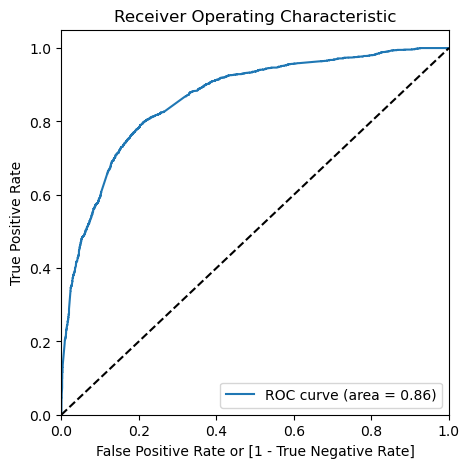

In [825]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model.

In [826]:
# creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4530,0,0.123223,0,1,1,0,0,0,0,0,0,0,0
9125,0,0.216893,0,1,1,1,0,0,0,0,0,0,0
6561,0,0.104946,0,1,1,0,0,0,0,0,0,0,0
7488,0,0.009684,0,1,0,0,0,0,0,0,0,0,0
2647,0,0.153451,0,1,1,0,0,0,0,0,0,0,0


In [827]:
# creating a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.475475     1.000000     0.000000
0.1   0.1  0.553797     0.990433     0.157994
0.2   0.2  0.710641     0.934276     0.507919
0.3   0.3  0.757516     0.898918     0.629336
0.4   0.4  0.789953     0.806156     0.775264
0.5   0.5  0.790546     0.740849     0.835596
0.6   0.6  0.779866     0.676789     0.873303
0.7   0.7  0.742484     0.546173     0.920437
0.8   0.8  0.714992     0.452163     0.953243
0.9   0.9  0.638449     0.258735     0.982655


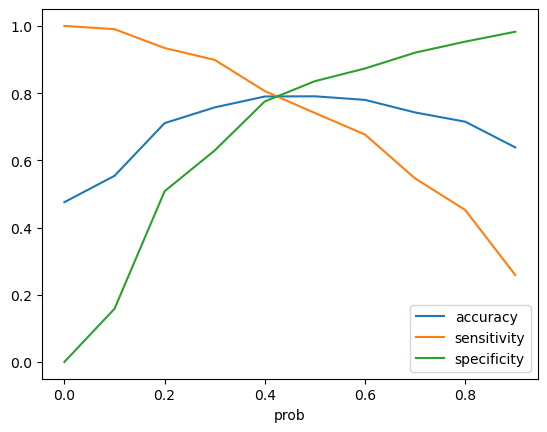

In [828]:
#plot 

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

As we can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [829]:
#applying 0.42  as our cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4530,0,0.123223,0,1,1,0,0,0,0,0,0,0,0,0
9125,0,0.216893,0,1,1,1,0,0,0,0,0,0,0,0
6561,0,0.104946,0,1,1,0,0,0,0,0,0,0,0,0
7488,0,0.009684,0,1,0,0,0,0,0,0,0,0,0,0
2647,0,0.153451,0,1,1,0,0,0,0,0,0,0,0,0


In [830]:
#checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.792128164556962

In [831]:
#creating the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion2

array([[2216,  436],
       [ 623, 1781]], dtype=int64)

In [832]:
# evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [833]:
# Calculating Sensitivity

TP/(TP+FN)

0.7408485856905158

In [834]:
# Calculating Specificity

TN/(TN+FP)

0.8355957767722474

## Step 4: Making Predictions on the Test Set



In [835]:
#reviewing the X_test dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
3291,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2732,1.0,36,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3446,2.0,950,2.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5800,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957,5.0,542,5.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [836]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [837]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
3291,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2732,0.003984,0.015845,0.111111,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3446,0.007968,0.418134,0.222222,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5800,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957,0.019920,0.238556,0.555556,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [838]:
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [839]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3291,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1,0,0,0
2732,0.003984,0.015845,0,0,0,0,1,0,0,0,0,1,0,0,0
3446,0.007968,0.418134,0,0,0,0,0,0,0,0,0,1,0,0,0
5800,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
957,0.019920,0.238556,0,0,0,0,0,0,0,0,0,1,0,0,0


In [840]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])


In [841]:
# Checking X_test_sm

X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3291,1.0,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1,0,0,0
2732,1.0,0.003984,0.015845,0,0,0,0,1,0,0,0,0,1,0,0,0
3446,1.0,0.007968,0.418134,0,0,0,0,0,0,0,0,0,1,0,0,0
5800,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
957,1.0,0.019920,0.238556,0,0,0,0,0,0,0,0,0,1,0,0,0


In [842]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Welingak Website','What is your current occupation_Housewife', 
             'Last Notable Activity_Had a Phone Conversation','What is your current occupation_Working Professional'], axis=1, 
                                inplace = True)

In [843]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [844]:
y_test_pred[:10]

3291    0.825304
2732    0.039760
3446    0.428732
5800    0.956768
957     0.278064
1870    0.047814
8120    0.988300
5229    0.540543
8213    0.947414
8398    0.867157
dtype: float64

In [845]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [846]:
# Let's see the head

y_pred_1.head()

,0
3291,0.825304
2732,0.039760
3446,0.428732
5800,0.956768
957,0.278064


In [847]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [848]:
# Removeing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [849]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [850]:
# Checking 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.825304
1,0,0.039760
2,1,0.428732
3,1,0.956768
4,1,0.278064


In [851]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [852]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.825304
1,0,0.039760
2,1,0.428732
3,1,0.956768
4,1,0.278064


In [853]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [854]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.825304,1
1,0,0.039760,0
2,1,0.428732,1
3,1,0.956768,1
4,1,0.278064,0


In [855]:
# checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.775494071146245

In [856]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[495, 134],
       [150, 486]], dtype=int64)

In [857]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [858]:
# Calculate sensitivity
TP / float(TP+FN)

0.7641509433962265

In [859]:
# Calculate specificity
TN / float(TN+FP)

0.7869634340222575

## Precision-Recall View

building the training model using the precision-recall view

In [860]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2216,  436],
       [ 623, 1781]], dtype=int64)

#### Precision
TP / TP + FP

In [861]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8033378439332431

#### Recall
TP / TP + FN

In [862]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7408485856905158

###  Precision and recall tradeoff

In [863]:
from sklearn.metrics import precision_recall_curve

In [864]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(4530    0
 9125    0
 6561    0
 7488    0
 2647    0
        ..
 8831    1
 103     0
 5930    0
 8732    1
 8285    0
 Name: Converted, Length: 5056, dtype: int64,
 4530    0
 9125    0
 6561    0
 7488    0
 2647    0
        ..
 8831    1
 103     0
 5930    0
 8732    1
 8285    0
 Name: Predicted, Length: 5056, dtype: int64)

In [865]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

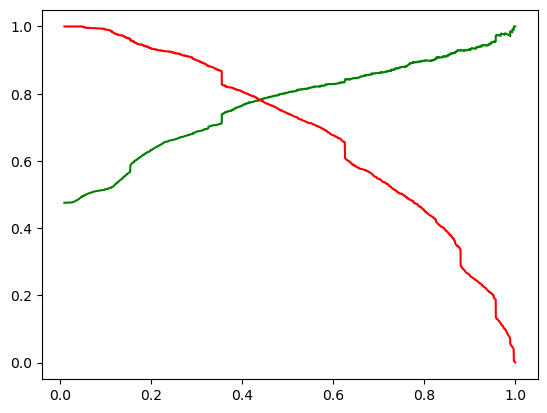

In [866]:
#plotting thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [867]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4530,0,0.123223,0,1,1,0,0,0,0,0,0,0,0,0
9125,0,0.216893,0,1,1,1,0,0,0,0,0,0,0,0
6561,0,0.104946,0,1,1,0,0,0,0,0,0,0,0,0
7488,0,0.009684,0,1,0,0,0,0,0,0,0,0,0,0
2647,0,0.153451,0,1,1,0,0,0,0,0,0,0,0,0


In [868]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7919303797468354

In [869]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2128,  524],
       [ 528, 1876]], dtype=int64)

In [870]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [871]:
# Calculate Precision

TP/(TP+FP)

0.7816666666666666

In [872]:
# Calculate Recall

TP/(TP+FN)

0.7803660565723793

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [873]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [874]:
y_test_pred[:10]

3291    0.825304
2732    0.039760
3446    0.428732
5800    0.956768
957     0.278064
1870    0.047814
8120    0.988300
5229    0.540543
8213    0.947414
8398    0.867157
dtype: float64

In [875]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [876]:
# Let's see the head

y_pred_1.head()

,0
3291,0.825304
2732,0.039760
3446,0.428732
5800,0.956768
957,0.278064


In [877]:
# Let's see the head

y_pred_1.head()

,0
3291,0.825304
2732,0.039760
3446,0.428732
5800,0.956768
957,0.278064


In [878]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [879]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [880]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [881]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.825304
1,0,0.039760
2,1,0.428732
3,1,0.956768
4,1,0.278064


In [882]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [883]:
# the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.825304
1,0,0.039760
2,1,0.428732
3,1,0.956768
4,1,0.278064


In [884]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [885]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.825304,1
1,0,0.039760,0
2,1,0.428732,0
3,1,0.956768,1
4,1,0.278064,0


In [886]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.775494071146245

In [887]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[501, 128],
       [156, 480]], dtype=int64)

In [888]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [889]:
# Calculating Precision

TP/(TP+FP)

0.7894736842105263

In [890]:
# Calculating Recall

TP/(TP+FN)

0.7547169811320755